In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# open the loan dataset 
df=pd.read_csv('prosperLoanData.csv')

I chose the loan prosper file to do the data analysis. This data set is the information of the loan borrowers.

In [2]:
# make a copy and see the head part
df=df.copy()
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# get the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

I'll select the columns that I'm only interested for my dataset 

In [4]:
df_new= df[['ListingCreationDate','StatedMonthlyIncome','Term','LoanStatus','BorrowerAPR','BorrowerRate','CreditScoreRangeLower','CreditScoreRangeUpper','LenderYield','LP_ServiceFees','Investors']]

In [5]:
df_new.head()

,ListingCreationDate,StatedMonthlyIncome,Term,LoanStatus,BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,LenderYield,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263000000,3083.333333,36,Completed,0.16516,0.1580,640.0,659.0,0.1380,-133.18,258
1,2014-02-27 08:28:07.900000000,6125.000000,36,Current,0.12016,0.0920,680.0,699.0,0.0820,0.00,1
2,2007-01-05 15:00:47.090000000,2083.333333,36,Completed,0.28269,0.2750,480.0,499.0,0.2400,-24.20,41
3,2012-10-22 11:02:35.010000000,2875.000000,36,Current,0.12528,0.0974,800.0,819.0,0.0874,-108.01,158
4,2013-09-14 18:38:39.097000000,9583.333333,36,Current,0.24614,0.2085,680.0,699.0,0.1985,-60.27,20


In [6]:
# Get the statistics of the new dataset 
df_new.describe()

,StatedMonthlyIncome,Term,BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,LenderYield,LP_ServiceFees,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113346.000000,113346.000000,113937.000000,113937.000000,113937.000000
mean,5.608026e+03,40.830248,0.218828,0.192764,685.567731,704.567731,0.182701,-54.725641,80.475228
std,7.478497e+03,10.436212,0.080364,0.074818,66.458275,66.458275,0.074516,60.675425,103.239020
min,0.000000e+00,12.000000,0.006530,0.000000,0.000000,19.000000,-0.010000,-664.870000,1.000000
25%,3.200333e+03,36.000000,0.156290,0.134000,660.000000,679.000000,0.124200,-73.180000,2.000000
50%,4.666667e+03,36.000000,0.209760,0.184000,680.000000,699.000000,0.173000,-34.440000,44.000000
75%,6.825000e+03,36.000000,0.283810,0.250000,720.000000,739.000000,0.240000,-13.920000,115.000000
max,1.750003e+06,60.000000,0.512290,0.497500,880.000000,899.000000,0.492500,32.060000,1189.000000


Create a new column credit score that is the average of upper and lower credit score 

In [7]:
df_new['CreditScore']=(df_new.CreditScoreRangeUpper+df_new.CreditScoreRangeLower)/2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_new.head()

,ListingCreationDate,StatedMonthlyIncome,Term,LoanStatus,BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,LenderYield,LP_ServiceFees,Investors,CreditScore
0,2007-08-26 19:09:29.263000000,3083.333333,36,Completed,0.16516,0.1580,640.0,659.0,0.1380,-133.18,258,649.5
1,2014-02-27 08:28:07.900000000,6125.000000,36,Current,0.12016,0.0920,680.0,699.0,0.0820,0.00,1,689.5
2,2007-01-05 15:00:47.090000000,2083.333333,36,Completed,0.28269,0.2750,480.0,499.0,0.2400,-24.20,41,489.5
3,2012-10-22 11:02:35.010000000,2875.000000,36,Current,0.12528,0.0974,800.0,819.0,0.0874,-108.01,158,809.5
4,2013-09-14 18:38:39.097000000,9583.333333,36,Current,0.24614,0.2085,680.0,699.0,0.1985,-60.27,20,689.5


Some clean up before visualization

In [9]:
df_new.isnull().sum()

ListingCreationDate        0
StatedMonthlyIncome        0
Term                       0
LoanStatus                 0
BorrowerAPR               25
BorrowerRate               0
CreditScoreRangeLower    591
CreditScoreRangeUpper    591
LenderYield                0
LP_ServiceFees             0
Investors                  0
CreditScore              591
dtype: int64

remove null value rows 

In [10]:
df_1= df_new.dropna(axis=0)

In [11]:
df_1.describe()

,StatedMonthlyIncome,Term,BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,LenderYield,LP_ServiceFees,Investors,CreditScore
count,1.133460e+05,113346.000000,113346.000000,113346.000000,113346.000000,113346.000000,113346.000000,113346.000000,113346.000000,113346.000000
mean,5.605694e+03,40.855434,0.219027,0.192898,685.567731,704.567731,0.182830,-54.870136,80.694193,695.067731
std,7.487776e+03,10.457540,0.080285,0.074733,66.458275,66.458275,0.074441,60.761374,103.432526,66.458275
min,0.000000e+00,12.000000,0.006530,0.000000,0.000000,19.000000,-0.010000,-664.870000,1.000000,9.500000
25%,3.206667e+03,36.000000,0.156290,0.134600,660.000000,679.000000,0.124600,-73.360000,2.000000,669.500000
50%,4.666667e+03,36.000000,0.209860,0.184000,680.000000,699.000000,0.174000,-34.610000,44.000000,689.500000
75%,6.807937e+03,36.000000,0.283860,0.250000,720.000000,739.000000,0.240000,-14.010000,116.000000,729.500000
max,1.750003e+06,60.000000,0.423950,0.360000,880.000000,899.000000,0.340000,32.060000,1189.000000,889.500000


In [12]:
df_1.isnull().sum()

ListingCreationDate      0
StatedMonthlyIncome      0
Term                     0
LoanStatus               0
BorrowerAPR              0
BorrowerRate             0
CreditScoreRangeLower    0
CreditScoreRangeUpper    0
LenderYield              0
LP_ServiceFees           0
Investors                0
CreditScore              0
dtype: int64

Loan Data Analysis

Univerate Exploration 

1. How the borrower APR is distributed ? Univariate plot of BorrowerAPR.

Text(0.5,1,'BorrowerAPR distribution')

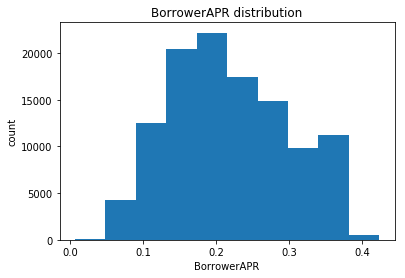

In [13]:
plt.hist(data=df_1, x='BorrowerAPR')
plt.xlabel('BorrowerAPR')
plt.ylabel('count')
plt.title('BorrowerAPR distribution')

I got a histogram of the borrowerAPR to see the distribution of the borrowerAPR, and most of them are concentrated at 0.15-0.3.

2. How the borrowers' stated monthly income is distributed ? Univariate plot of stated monthly income.

Text(0.5,1,'Borrower monthly income distribution')

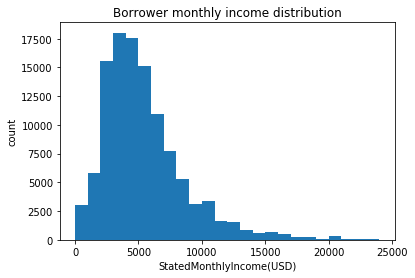

In [27]:
bins_x= np.arange(0, 25000, 1000)
plt.hist(data=df_1, x='StatedMonthlyIncome',bins=bins_x)
plt.xlabel('StatedMonthlyIncome(USD)')
plt.ylabel('count')
plt.title('Borrower monthly income distribution')


I also got a histogram of the borrowers’ stated monthly income, to see the distribution of it. The majority borrowers’ income is concentrated at 3000-6000.

3. How the credit score is distributed ? Univariate plot of credit score.

Text(0.5,1,'Credit score distribution')

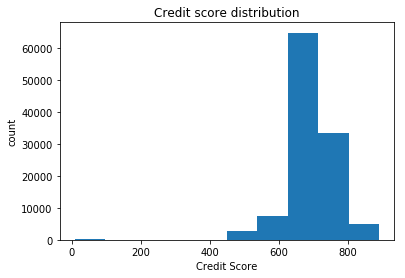

In [15]:
plt.hist(data=df_1, x='CreditScore')
plt.xlabel('Credit Score')
plt.ylabel('count')
plt.title('Credit score distribution')

Most borrowers' credit score is concentrated at between 650-800.

4.How the lender yield is distributed ? Univariate plot of lender yield.

Text(0.5,1,'Lender Yeild distribution')

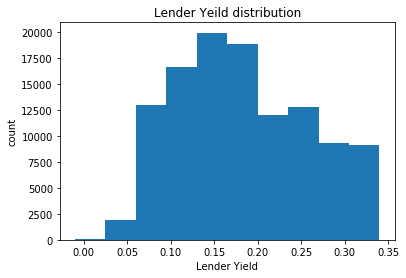

In [16]:
plt.hist(data=df_1, x='LenderYield')
plt.xlabel('Lender Yield')
plt.ylabel('count')
plt.title('Lender Yeild distribution')

Most lender yield is concentrated between 0.06-0.33.

5. What's the distribution of the terms? Univariate plot of terms.

Text(0.5,1,'Term distribution')

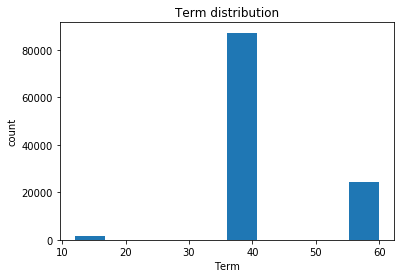

In [17]:
plt.hist(data=df_1, x='Term')
plt.xlabel('Term')
plt.ylabel('count')
plt.title('Term distribution')

The investment terms is either about 40 or 60.

6. What's the distribution of the investors number ? Univariate plot for investors.

Text(0.5,1,'Investors distribution')

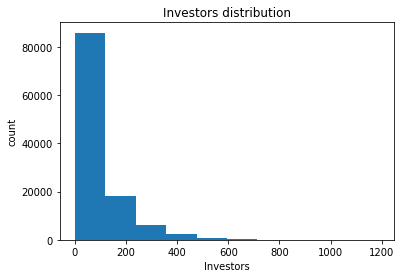

In [18]:
plt.hist(data=df_1, x='Investors')
plt.xlabel('Investors')
plt.ylabel('count')
plt.title('Investors distribution')

Most investors is about 0-100.

Bivariate Exploration

1. What's the relationship between the borrowers' monthly income and credit score ? Bivariate plot of stated monthly income and credit score.

Text(0.5,1,'Stated monthly income and credit score')

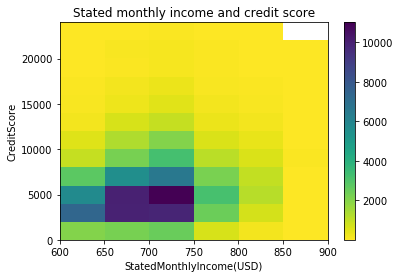

In [19]:
bins_x = np.arange(600, 900+50, 50)
bins_y = np.arange(0,25000, 2000)
plt.hist2d(data = df_1, x = 'CreditScore', y='StatedMonthlyIncome',
         cmin = 0.5,cmap = 'viridis_r' ,bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('StatedMonthlyIncome(USD)')
plt.ylabel('CreditScore');
plt.title('Stated monthly income and credit score')

I got the heat map of the stated monthly income and credit score. From the graph, I can see most borrowers’ credit score and income is concentrated at credit score between 650-750, stated monthly income between 3000-5000.


2. Do people from different income level have different borrower APR ? Monthly income level and borrower APR.

In [20]:
bin_edges = [0,3200,4700,6800,1750000]
bin_names=['low','medium','high','very high']

In [21]:
df_1['income_level']= pd.cut(df_1['StatedMonthlyIncome'],bin_edges, labels = bin_names)
df_1.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ListingCreationDate,StatedMonthlyIncome,Term,LoanStatus,BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,LenderYield,LP_ServiceFees,Investors,CreditScore,income_level
0,2007-08-26 19:09:29.263000000,3083.333333,36,Completed,0.16516,0.1580,640.0,659.0,0.1380,-133.18,258,649.5,low
1,2014-02-27 08:28:07.900000000,6125.000000,36,Current,0.12016,0.0920,680.0,699.0,0.0820,0.00,1,689.5,high
2,2007-01-05 15:00:47.090000000,2083.333333,36,Completed,0.28269,0.2750,480.0,499.0,0.2400,-24.20,41,489.5,low
3,2012-10-22 11:02:35.010000000,2875.000000,36,Current,0.12528,0.0974,800.0,819.0,0.0874,-108.01,158,809.5,low
4,2013-09-14 18:38:39.097000000,9583.333333,36,Current,0.24614,0.2085,680.0,699.0,0.1985,-60.27,20,689.5,very high


Text(0.5,1,'Borrower APR and Income level')

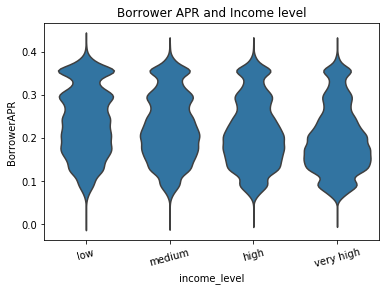

In [28]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df_1, x='income_level', y ='BorrowerAPR', 
              color = base_color,inner = None)
plt.xticks(rotation =15)
plt.title('Borrower APR and Income level')

The borrower APR are not varied too much between the income levels, expect the high and very high level income group have more borrower APR concentrated around 0.1-0.2.

3. Does the lender yield have anything to do with the borrowers' credit score? Credit score level and lender yield.

In [23]:
bin_edges = [0,660,680,720,880]
bin_names=['low','medium','high','very high']

In [24]:
df_1['credit_level']= pd.cut(df_1['CreditScore'],bin_edges, labels = bin_names)
df_1.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ListingCreationDate,StatedMonthlyIncome,Term,LoanStatus,BorrowerAPR,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,LenderYield,LP_ServiceFees,Investors,CreditScore,income_level,credit_level
0,2007-08-26 19:09:29.263000000,3083.333333,36,Completed,0.16516,0.1580,640.0,659.0,0.1380,-133.18,258,649.5,low,low
1,2014-02-27 08:28:07.900000000,6125.000000,36,Current,0.12016,0.0920,680.0,699.0,0.0820,0.00,1,689.5,high,high
2,2007-01-05 15:00:47.090000000,2083.333333,36,Completed,0.28269,0.2750,480.0,499.0,0.2400,-24.20,41,489.5,low,low
3,2012-10-22 11:02:35.010000000,2875.000000,36,Current,0.12528,0.0974,800.0,819.0,0.0874,-108.01,158,809.5,low,very high
4,2013-09-14 18:38:39.097000000,9583.333333,36,Current,0.24614,0.2085,680.0,699.0,0.1985,-60.27,20,689.5,very high,high


Text(0.5,1,'credit_level and lender yield association')

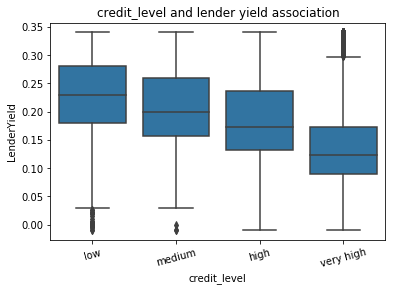

In [25]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df_1, x='credit_level', y ='LenderYield', 
              color = base_color)
plt.xticks(rotation =15)
plt.title('credit_level and lender yield association')

With the credit level goes up, the lender yield goes down. 

3. What's the relationship between borrower APR and lener yield, is it the same among different credit level and income level? Multivariate plot.

Text(0.5,1,'BorrowerAPR and lender yield association')

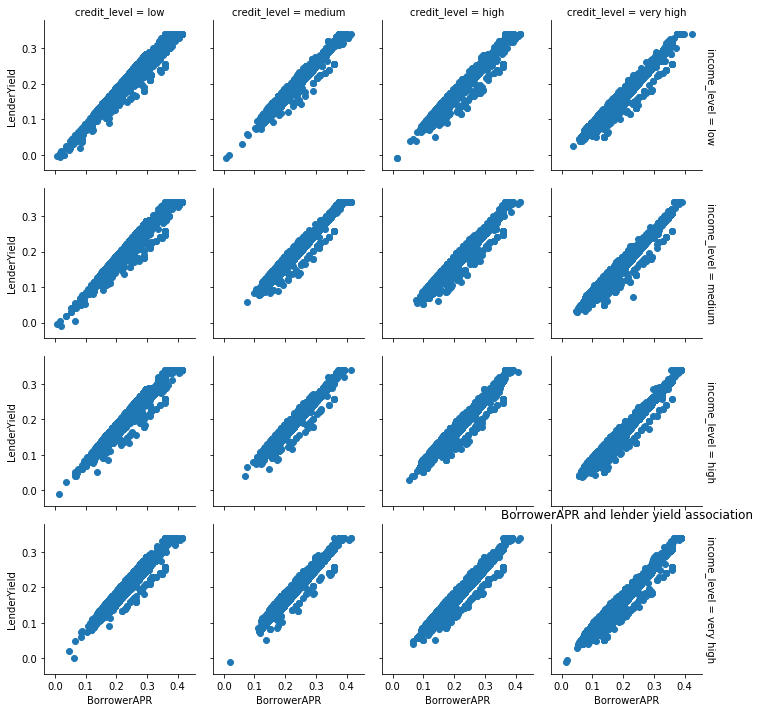

In [26]:
g = sb.FacetGrid(data = df_1, col = 'credit_level', row = 'income_level', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'BorrowerAPR', 'LenderYield')
plt.title('BorrowerAPR and lender yield association')

The borrowr APR and lender yield has the same linear association regardless of credit level or 
income level. 